In [1]:
from GasDynamicsSim import ShockSim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\Users\Jackie Zheng\PycharmProjects\stanshock_adapt\stanShock.py:394: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "getCp_python" failed type inference due to: No implementation of function Function(<built-in function zeros>) found for signature:
 
 >>> zeros(int64, dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload of function 'zeros': File: numba\core\typing\npydecl.py: Line 507.
    With argument(s): '(int64, dtype=Function(<class 'int'>))':
   No match.

During: resolving callee type: Function(<built-in function zeros>)
During: typing of call at C:\Users\Jackie Zheng\PycharmProjects\stanshock_adapt\stanShock.py (417)


File "stanShock.py", line 417:
def getCp_python(T,Y,TTable,a,b):
    <source elided>
    #determine the indices
    indices = np.zeros(nX,dtype=int)
    ^

  def getCp_python(T,Y,TTable,a,b):
C:\Users\Jackie Zheng\PycharmProjects\stanshock_ada

Iteration: 100. Current time: 0.001906. Final time: 0.035000. Time step: 1.864756e-05.
Iteration: 200. Current time: 0.003768. Final time: 0.035000. Time step: 1.859812e-05.
Iteration: 300. Current time: 0.005626. Final time: 0.035000. Time step: 1.856528e-05.
Iteration: 400. Current time: 0.007482. Final time: 0.035000. Time step: 1.855952e-05.
Iteration: 500. Current time: 0.009339. Final time: 0.035000. Time step: 1.858006e-05.
Iteration: 600. Current time: 0.011198. Final time: 0.035000. Time step: 1.860639e-05.
Iteration: 700. Current time: 0.013061. Final time: 0.035000. Time step: 1.865364e-05.
Iteration: 800. Current time: 0.015168. Final time: 0.035000. Time step: 2.214957e-05.
Iteration: 900. Current time: 0.017437. Final time: 0.035000. Time step: 2.342682e-05.
Iteration: 1000. Current time: 0.019888. Final time: 0.035000. Time step: 2.506291e-05.
Iteration: 1100. Current time: 0.022348. Final time: 0.035000. Time step: 2.425570e-05.
Iteration: 1200. Current time: 0.024814. 

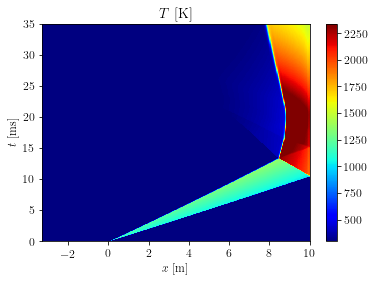

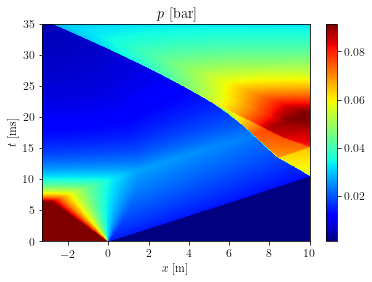

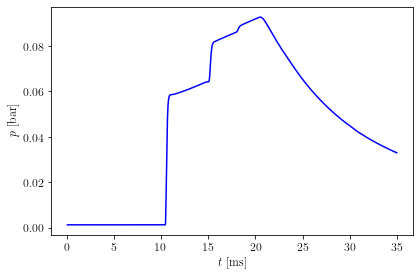

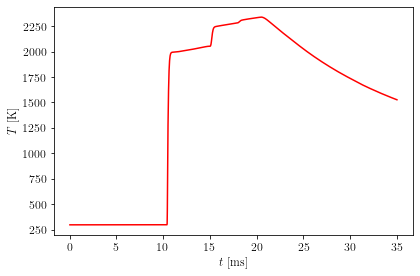

In [2]:
Mixture = {
    'mechanism':"Propane.xml",
    'X1':"C3H8: 0.5, AR:0.5",
    'X4':"N2: 0.4, HE: 0.6",
    'XBuffer':"AR: 1.",
    'XBackfill':("N2:0.45, HE:0.55", "N2:0.5, HE:0.5", "N2:0.55, HE:0.45","N2:0.6, HE:0.4","N2:0.8, HE:0.2","N2:1")
}

Thermal = {
    'p4':60*6894.76,#
    'p1':52.4*133.322,
    'T1':21+273,
}


Sim = {
    'nXFine':500, #grid definition
    'tFinal':100e-3, # simulation time
    'Backfill': True,
    'CRV': True,
    'alpha':0.9, # boundary layer correction term for shear stress. 1 for incompressible case
    'beta':0.8, # boundary layer correction term for heat transfer. 1 for incompressible case
    'D_mul':1, # boundary layer correction term for effective diameter. 1 for incompressible case
    'BoundaryLayer': True,
    'Reacting': False,
    'Diffusion': False
}

Geometry = {
    'LDriver':13.4,# driver section length
    'LDriven':9.73,# driven section length
    'DDriver':11.53e-2, # driver section diameter
    'DDriven':11.53e-2, # driven section diameter
    'LBackfill':[10, 8, 6, 5, 4, 3],
    'BufferFraction':9.32/9.73
}

ssim = ShockSim(Mixture, Thermal, Sim, Geometry, saveData = False)
ssim.XT_Diagram()

In [ ]:
np.savetxt('TMatrix.csv', ssim.TMatrix, delimiter=',')
np.savetxt('pMatrix.csv', ssim.pMatrix, delimiter=',')
np.savetxt('timeXT.csv', ssim.timeXT, delimiter=',')
np.savetxt('positionXT.csv', ssim.positionXT, delimiter=',')